# Лабораторная работа №4,  Компьютерная геометрия и геометрическое моделирование
- Ф.И.О: **Яссин Мохамад Аламин**.
- Ноиер студ. билета: **1032205004**.
- Группа: **НКНбд-01-20**.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, RegularPolygon
import numpy as np

In [2]:
from PIL import Image

## №1

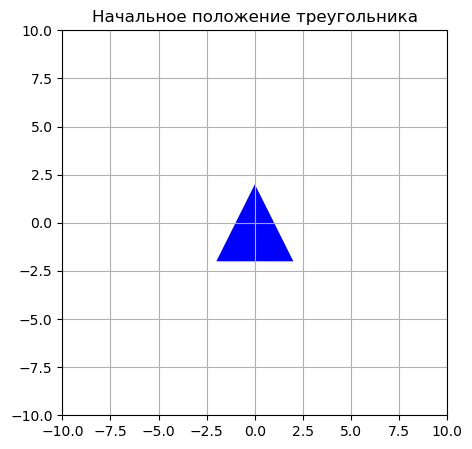

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Определение треугольника в локальной системе координат
triangle = np.array([
    [-1, -1, 1],
    [1, -1, 1],
    [0, 1, 1]
])

# Начальное положение объекта (центр глобальной системы координат, не повернут)
M = np.array([
    [2, 0, 0],
    [0, 2, 0],
    [0, 0, 2]
])

triangle_mt=triangle @ M.T

# Отображение треугольника в начальном положении
def plot_polygon(polygon, title=""):
    plt.figure(figsize=(5,5))
    plt.fill(polygon[:, 0], polygon[:, 1], 'b-')
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.grid(True)
    plt.title(title)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

plot_polygon(triangle_mt, "Начальное положение треугольника")

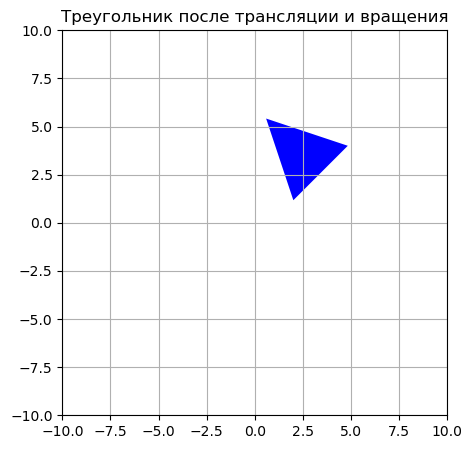

In [4]:
# Трансляция на (3, 2)
translation_matrix = np.array([
    [1, 0, 1],
    [0, 1, 2],
    [0, 0, 1]
])

# Вращение на 45 градусов против часовой стрелки
theta = np.radians(45)
rotation_matrix = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta), np.cos(theta), 0],
    [0, 0, 1]
])

# Применение преобразований
transformed_triangle = triangle_mt @ (translation_matrix @ rotation_matrix).T

# Отображение результата
plot_polygon(transformed_triangle, "Треугольник после трансляции и вращения")

In [5]:
import os

# Создаем директорию для сохранения изображений
output_dir = "/content"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Количество кадров
num_frames = 36

# Угол вращения для каждого кадра
angle_per_frame = 360 / num_frames

# Функция для сохранения изображений
def save_polygon_frame(polygon, frame_num):
    plt.figure(figsize=(5,5))
    plt.fill(polygon[:, 0], polygon[:, 1], 'b-')
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.savefig(os.path.join(output_dir, f"frame_{frame_num:03d}.png"))
    plt.close()

# Создание кадров
for i in range(num_frames):
    theta = np.radians(angle_per_frame)
    rotation_matrix = np.array([
        [np.cos(i), -np.sin(i), 0],
        [np.sin(i), np.cos(i), 0],
        [0, 0, 1]
    ])
    rotated_triangle = triangle_mt @ rotation_matrix.T
    save_polygon_frame(rotated_triangle, i)

# Путь к первому кадру (для проверки)
first_frame_path = os.path.join(output_dir, "frame_000.png")
first_frame_path

'/content\\frame_000.png'

In [6]:
import subprocess

cmd = "ffmpeg -framerate 10 -i /content/frame_%03d.png -c:v libx264 -pix_fmt yuv420p triangle_animation.mp4"
subprocess.run(cmd, shell=True)

CompletedProcess(args='ffmpeg -framerate 10 -i /content/frame_%03d.png -c:v libx264 -pix_fmt yuv420p triangle_animation.mp4', returncode=1)

## № 2

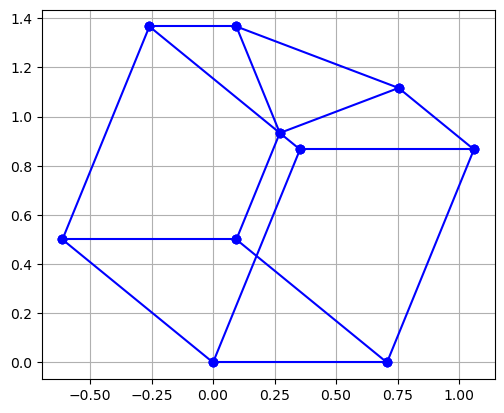

In [7]:
import numpy as np

class Polyhedron:
    def __init__(self, vertices, edges):
        self.vertices = vertices
        self.edges = edges
        self.transformed_vertices = np.copy(vertices)

    def trimetric_projection(self, alpha, beta, gamma):
        """
        Apply the trimetric projection to the vertices using the specified angles.
        """
        alpha = np.radians(alpha)
        beta = np.radians(beta)
        gamma = np.radians(gamma)

        M = np.array([
            [np.cos(beta), np.sin(alpha)*np.sin(beta), -np.sin(beta)*np.cos(alpha)],
            [0, np.cos(alpha), np.sin(alpha)],
            [np.sin(beta), -np.sin(alpha)*np.cos(beta), np.cos(alpha)*np.cos(beta)]
        ])

        for i, vertex in enumerate(self.vertices):
            self.transformed_vertices[i] = np.dot(M, vertex)

    def plot(self):
        """
        Plot the transformed shape.
        """
        fig, ax = plt.subplots()
        for edge in self.edges:
            points = self.transformed_vertices[edge].T
            ax.plot(points[0], points[1], 'bo-')
        ax.set_aspect('equal', 'box')
        plt.grid(True)
        plt.show()

# Initialize the polyhedron with the provided vertices and edges
truncated_cube = Polyhedron(
    vertices=np.array([
        [0, 0, 1],    # 0
        [1, 0, 1],    # 1
        [1, 0.5, 1],  # 2
        [0.5, 1, 1],  # 3
        [0, 1, 1],    # 4
        [0, 0, 0],    # 5
        [1, 0, 0],    # 6
        [1, 1, 0],    # 7
        [0, 1, 0],    # 8
        [1, 1, 0.5]   # 9
    ]),
    edges=[
        [0, 1], [1, 2], [2, 3], [3, 4], [4, 0],  # top face
        [5, 6], [6, 7], [7, 8], [8, 5],  # bottom face
        [0, 5], [1, 6], [4, 8], [3, 9], [2, 9], [9, 7]  # vertical edges
    ]
)

# Test the trimetric projection with arbitrary angles and plot the result
truncated_cube.trimetric_projection(alpha=30, beta=45, gamma=60)
truncated_cube.plot()


## №3

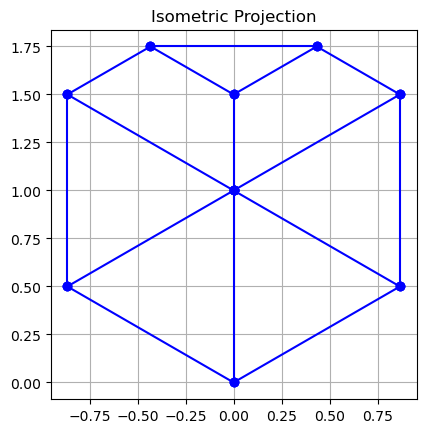

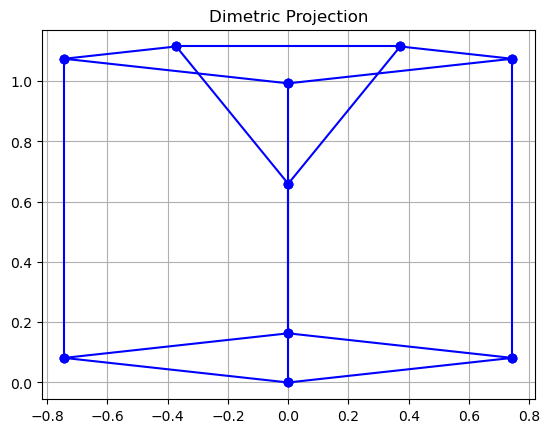

In [8]:
class Polyhedron:
    def __init__(self, vertices, edges):
        self.vertices = vertices
        self.edges = edges
        self.transformed_vertices = np.copy(vertices)

    def trimetric_projection(self, alpha, beta, gamma):
        """
        Apply the trimetric projection to the vertices using the specified angles.
        """
        alpha = np.radians(alpha)
        beta = np.radians(beta)
        gamma = np.radians(gamma)

        M = np.array([
            [np.cos(beta), np.sin(alpha)*np.sin(beta), -np.sin(beta)*np.cos(alpha)],
            [0, np.cos(alpha), np.sin(alpha)],
            [np.sin(beta), -np.sin(alpha)*np.cos(beta), np.cos(alpha)*np.cos(beta)]
        ])

        self.apply_projection(M)

    def isometric_projection(self):
        """
        Apply the isometric projection to the vertices.
        """
        M = np.array([
            [np.sqrt(3)/2, 0, -np.sqrt(3)/2],
            [1/2, 1, 1/2],
            [0, 0, 0]
        ])

        self.apply_projection(M)

    def dimetric_projection(self):
        """
        Apply a dimetric projection to the vertices.
        For simplicity, we use common angles for a dimetric projection.
        """
        alpha = np.radians(7)
        beta = np.radians(42)

        M = np.array([
            [np.cos(beta), 0, -np.cos(beta)],
            [np.sin(beta)*np.sin(alpha), np.cos(alpha), np.sin(beta)*np.sin(alpha)],
            [0, 0, 0]
        ])

        self.apply_projection(M)

    def apply_projection(self, M):
        """
        Apply the given projection matrix to the vertices.
        """
        for i, vertex in enumerate(self.vertices):
            self.transformed_vertices[i] = np.dot(M, vertex)

    def plot(self, title=None):
        """
        Plot the transformed shape.
        """
        fig, ax = plt.subplots()
        for edge in self.edges:
            points = self.transformed_vertices[edge].T
            ax.plot(points[0], points[1], 'bo-')
        ax.set_aspect('equal', 'box')
        plt.grid(True)
        if title:
            plt.title(title)
        plt.show()

# Initialize the polyhedron with the provided vertices and edges
truncated_cube = Polyhedron(
    vertices=np.array([
        [0, 0, 1],    # 0
        [1, 0, 1],    # 1
        [1, 0.5, 1],  # 2
        [0.5, 1, 1],  # 3
        [0, 1, 1],    # 4
        [0, 0, 0],    # 5
        [1, 0, 0],    # 6
        [1, 1, 0],    # 7
        [0, 1, 0],    # 8
        [1, 1, 0.5]   # 9
    ]),
    edges=[
        [0, 1], [1, 2], [2, 3], [3, 4], [4, 0],  # top face
        [5, 6], [6, 7], [7, 8], [8, 5],  # bottom face
        [0, 5], [1, 6], [4, 8], [3, 9], [2, 9], [9, 7]  # vertical edges
    ]
)

# Plot the isometric projection
truncated_cube.isometric_projection()
truncated_cube.plot(title="Isometric Projection")

# Plot the dimetric projection
truncated_cube.dimetric_projection()
truncated_cube.plot(title="Dimetric Projection")


## №4

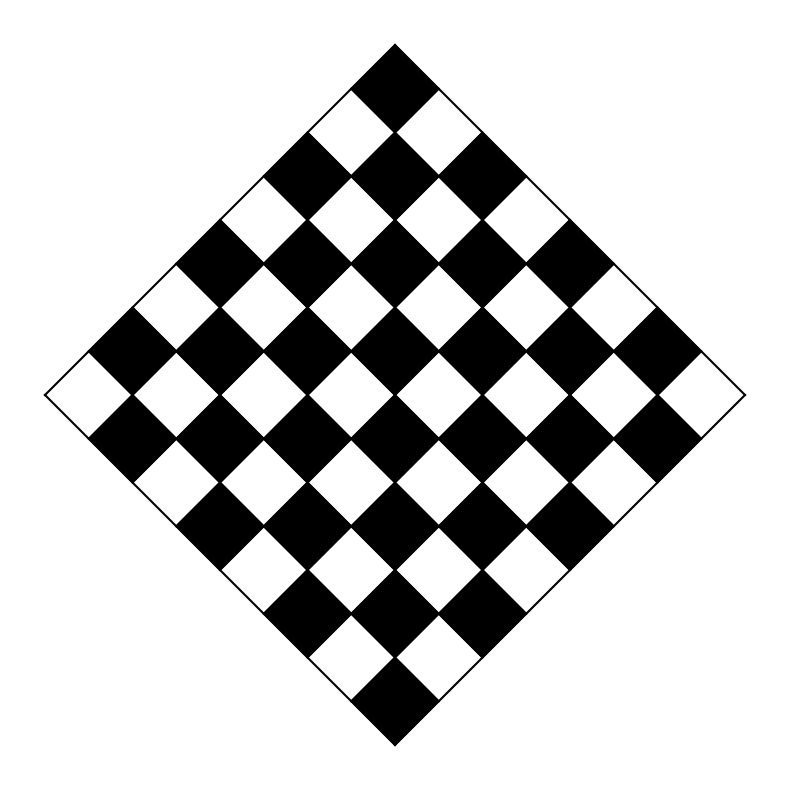

In [9]:
import numpy as np

def draw_isometric_board(ax, size=8, cell_size=1):
    """Draw an isometric chess board."""
    # Define the isometric transform
    iso_transform = np.array([[0.5, 0.5], [-0.5, 0.5]])

    # Draw the board
    for i in range(size + 1):
        # Vertical lines
        start = np.array([i * cell_size, 0])
        end = np.array([i * cell_size, size * cell_size])
        start_iso = np.dot(start, iso_transform)
        end_iso = np.dot(end, iso_transform)
        ax.plot([start_iso[0], end_iso[0]], [start_iso[1], end_iso[1]], color='black')

        # Horizontal lines
        start = np.array([0, i * cell_size])
        end = np.array([size * cell_size, i * cell_size])
        start_iso = np.dot(start, iso_transform)
        end_iso = np.dot(end, iso_transform)
        ax.plot([start_iso[0], end_iso[0]], [start_iso[1], end_iso[1]], color='black')

    # Fill in the chess pattern
    for i in range(size):
        for j in range(size):
            if (i + j) % 2 == 0:
                bottom_left = np.array([i * cell_size, j * cell_size])
                top_right = bottom_left + cell_size
                corners = [
                    bottom_left,
                    [top_right[0], bottom_left[1]],
                    top_right,
                    [bottom_left[0], top_right[1]],
                    bottom_left
                ]
                iso_corners = np.dot(corners, iso_transform)
                ax.fill(iso_corners[:, 0], iso_corners[:, 1], color='black')

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect('equal')
ax.axis('off')
draw_isometric_board(ax)
plt.show()


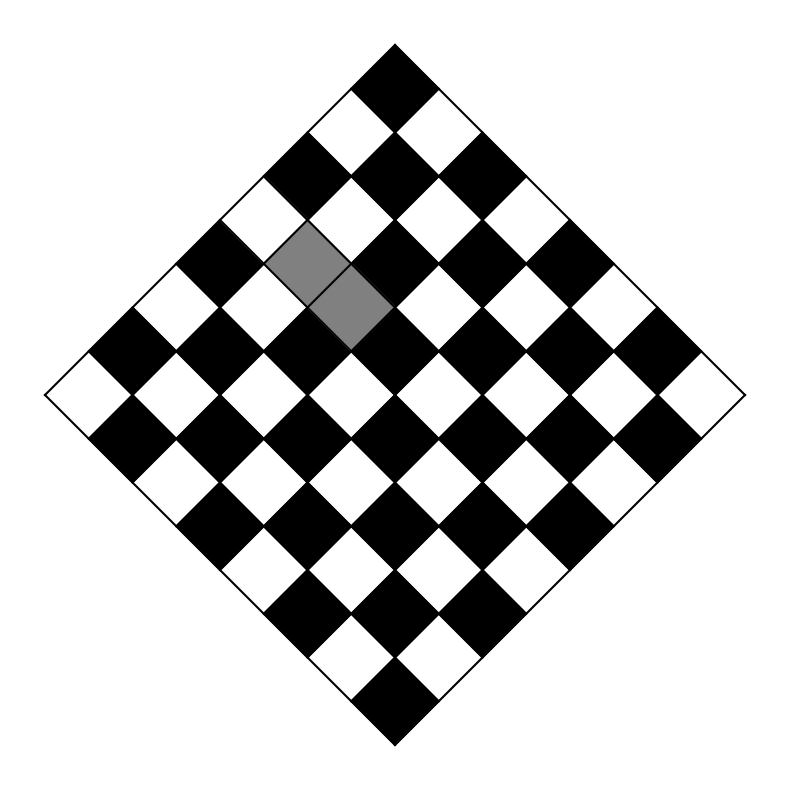

In [10]:
def draw_isometric_cube(ax, position, cell_size=1, height=1):
    """Draw an isometric cube on the board at the given position."""
    # Define the isometric transform
    iso_transform = np.array([[0.5, 0.5], [-0.5, 0.5]])

    x, y = position
    bottom_left = np.array([x * cell_size, y * cell_size])
    bottom_right = bottom_left + [cell_size, 0]
    top_left = bottom_left + [0, cell_size]
    top_right = bottom_left + [cell_size, cell_size]

    # Calculate the top corners of the cube based on height
    top_left_high = top_left + [0, height]
    top_right_high = top_right + [0, height]
    bottom_left_high = bottom_left + [0, height]
    bottom_right_high = bottom_right + [0, height]

    # Bottom face
    corners = [bottom_left, bottom_right, top_right, top_left, bottom_left]
    iso_corners = np.dot(corners, iso_transform)
    ax.fill(iso_corners[:, 0], iso_corners[:, 1], color='grey')

    # Left face
    corners = [bottom_left, bottom_left_high, top_left_high, top_left, bottom_left]
    iso_corners = np.dot(corners, iso_transform)
    ax.fill(iso_corners[:, 0], iso_corners[:, 1], color='lightgrey')

    # Right face
    corners = [bottom_right, bottom_right_high, top_right_high, top_right, bottom_right]
    iso_corners = np.dot(corners, iso_transform)
    ax.fill(iso_corners[:, 0], iso_corners[:, 1], color='darkgrey')

class IsometricBoard:
    def __init__(self, size=8, cell_size=1):
        self.size = size
        self.cell_size = cell_size
        self.fig, self.ax = plt.subplots(figsize=(10, 10))
        self.ax.set_aspect('equal')
        self.ax.axis('off')
        self.heights = np.zeros((size, size))

    def draw_board(self):
        draw_isometric_board(self.ax, self.size, self.cell_size)

    def add_cube(self, position, height=1):
        x, y = position
        base_height = self.heights[x, y]
        draw_isometric_cube(self.ax, (x, y + base_height), self.cell_size, height)
        self.heights[x, y] += height

    def show(self):
        plt.show()

board = IsometricBoard()
board.draw_board()
board.add_cube((4, 5))
board.add_cube((4, 5))
board.show()


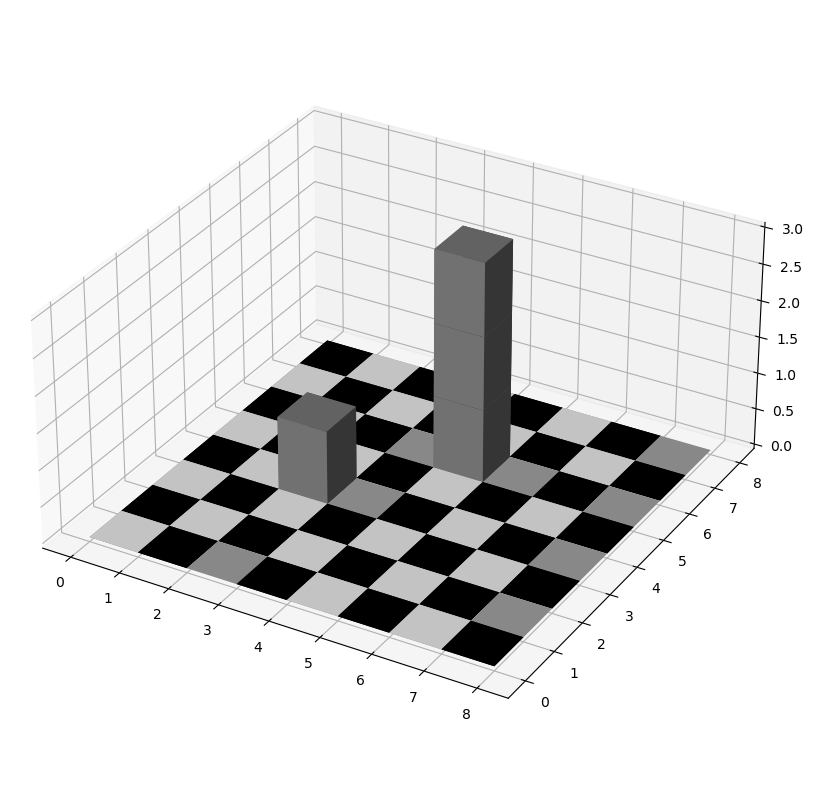

In [11]:
from mpl_toolkits.mplot3d import Axes3D

class IsometricBoard3D_Corrected:
    def __init__(self, size=8, cell_size=1):
        self.size = size
        self.cell_size = cell_size
        self.fig = plt.figure(figsize=(10, 10))
        self.ax = self.fig.add_subplot(111, projection='3d')
        self.ax.set_box_aspect([1, 1, 0.5])  # Adjust z-axis aspect to make it look more natural
        self.heights = np.zeros((size, size))

    def draw_board(self):
        # Draw the chessboard
        for i in range(self.size):
            for j in range(self.size):
                color = 'white' if (i + j) % 2 == 0 else 'black'
                self.ax.bar3d(i * self.cell_size, j * self.cell_size, 0, self.cell_size, self.cell_size, 0, shade=True, color=color)

    def add_cube(self, position, height=1):
        x, y = position
        base_height = self.heights[x, y]
        color = 'grey'  # default color for cubes
        self.ax.bar3d(x * self.cell_size, y * self.cell_size, base_height,
                      self.cell_size, self.cell_size, height, shade=True, color=color)
        self.heights[x, y] += height

    def show(self):
        plt.show()

board_3d_corrected = IsometricBoard3D_Corrected()
board_3d_corrected.draw_board()
board_3d_corrected.add_cube((2, 3))
board_3d_corrected.add_cube((4, 5))
board_3d_corrected.add_cube((4, 5))
board_3d_corrected.add_cube((4, 5))
board_3d_corrected.show()